#                                      AMAZON SALES REPORT

![amazon.jpg](amazon.jpg)

# Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Load the dataset

In [10]:
data = pd.read_csv('C:/Users/nihar/Downloads/Amazon Sale Report.csv')

In [43]:
data.shape

(128976, 21)

In [44]:
data.duplicated().sum()

168

In [46]:
data.isnull().sum()

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

In [48]:
df=data.drop(['New','PendingS','currency','index','fulfilled-by','Sales Channel','ship-country'],axis=1)

In [71]:
df.nunique()

Order ID              120229
Date                      91
Status                    13
Fulfilment                 2
ship-service-level         2
Category                   9
Size                      11
Courier Status             4
Qty                       10
Amount                  1408
ship-city               8948
ship-state                69
ship-postal-code        9454
B2B                        2
dtype: int64

In [49]:
print("Dataset Overview:")
df.head()

Dataset Overview:


,Order ID,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,T-shirt,S,On the Way,0,647.62,MUMBAI,MAHARASHTRA,400081.0,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,Shirt,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,Blazzer,L,On the Way,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,False
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,Trousers,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,False


In [50]:
df.tail()

,Order ID,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
128971,406-6001380-7673107,2022-05-31,Shipped,Amazon,Expedited,Shirt,XL,Shipped,1,517.0,HYDERABAD,TELANGANA,500013.0,False
128972,402-9551604-7544318,2022-05-31,Shipped,Amazon,Expedited,T-shirt,M,Shipped,1,999.0,GURUGRAM,HARYANA,122004.0,False
128973,407-9547469-3152358,2022-05-31,Shipped,Amazon,Expedited,Blazzer,XXL,Shipped,1,690.0,HYDERABAD,TELANGANA,500049.0,False
128974,402-6184140-0545956,2022-05-31,Shipped,Amazon,Expedited,T-shirt,XS,Shipped,1,1199.0,Halol,Gujarat,389350.0,False
128975,408-7436540-8728312,2022-05-31,Shipped,Amazon,Expedited,T-shirt,S,Shipped,1,696.0,Raipur,CHHATTISGARH,492014.0,False


In [51]:
print("Data Summary:")
print(df.info())

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128976 non-null  object        
 1   Date                128976 non-null  datetime64[ns]
 2   Status              128976 non-null  object        
 3   Fulfilment          128976 non-null  object        
 4   ship-service-level  128976 non-null  object        
 5   Category            128976 non-null  object        
 6   Size                128976 non-null  object        
 7   Courier Status      128976 non-null  object        
 8   Qty                 128976 non-null  int64         
 9   Amount              121176 non-null  float64       
 10  ship-city           128941 non-null  object        
 11  ship-state          128941 non-null  object        
 12  ship-postal-code    128941 non-null  float64       
 13  B2B            

In [52]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Date,Qty,Amount,ship-postal-code
count,128976,128976.000000,121176.000000,128941.000000
mean,2022-05-12 11:49:26.951991040,0.904401,648.562176,463945.677744
min,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,2022-05-10 00:00:00,1.000000,605.000000,500033.000000
75%,2022-06-04 00:00:00,1.000000,788.000000,600024.000000
max,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,NaN,0.313368,281.185041,191458.488954


# Group sales by date

In [53]:
daily_sales = df.groupby('Date')['Amount'].sum()

In [54]:
print(daily_sales)

Date
2022-03-31     101683.85
2022-04-01     865478.60
2022-04-02     913101.53
2022-04-03    1011763.38
2022-04-04     882059.17
                 ...    
2022-06-25     654234.58
2022-06-26     773610.02
2022-06-27     714124.67
2022-06-28     772085.53
2022-06-29     411530.76
Name: Amount, Length: 91, dtype: float64


# Plot sales trends over time

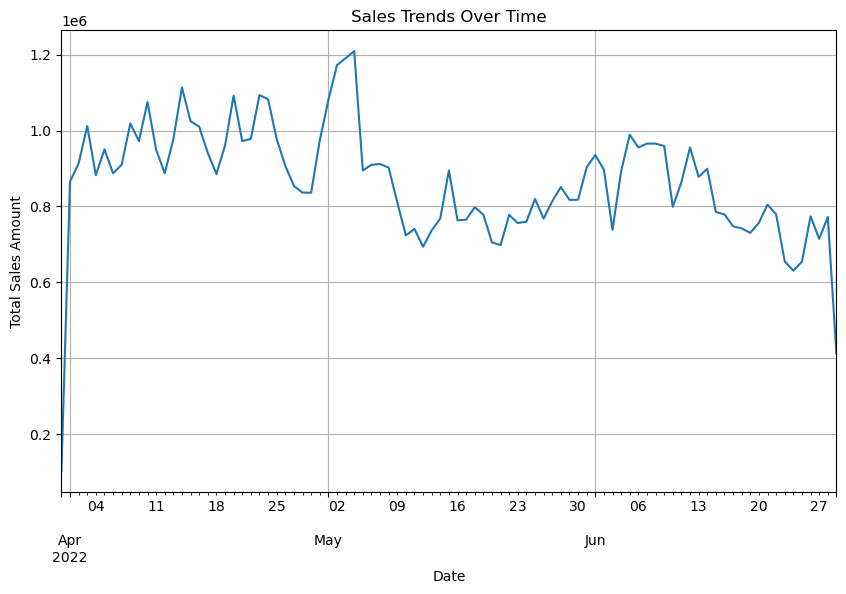

In [55]:
plt.figure(figsize = (10, 6))
daily_sales.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid()
plt.show()

# Product Analysis: Popular Products

In [56]:
product_category = df['Category'].value_counts()

In [57]:
print(product_category)

Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64


# Bar plot for product category

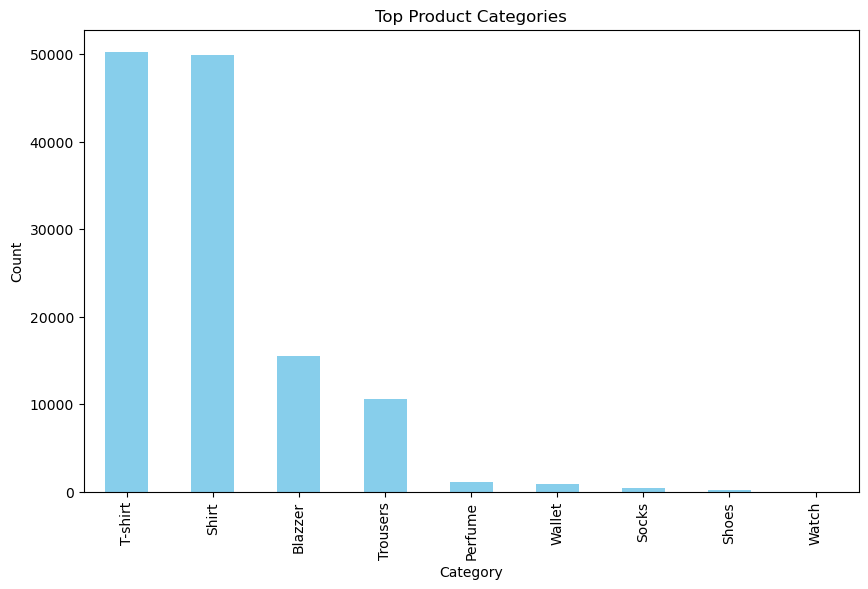

In [58]:
data['Category'].value_counts().head(10).plot(kind ='bar', figsize=(10, 6), color ='skyblue')
plt.title('Top Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Fulfillment Analysis

In [59]:
fulfillment_counts = df['Fulfilment'].value_counts()

In [60]:
fulfillment_counts

Fulfilment
Amazon      89713
Merchant    39263
Name: count, dtype: int64

# Pie chart for fulfillment methods

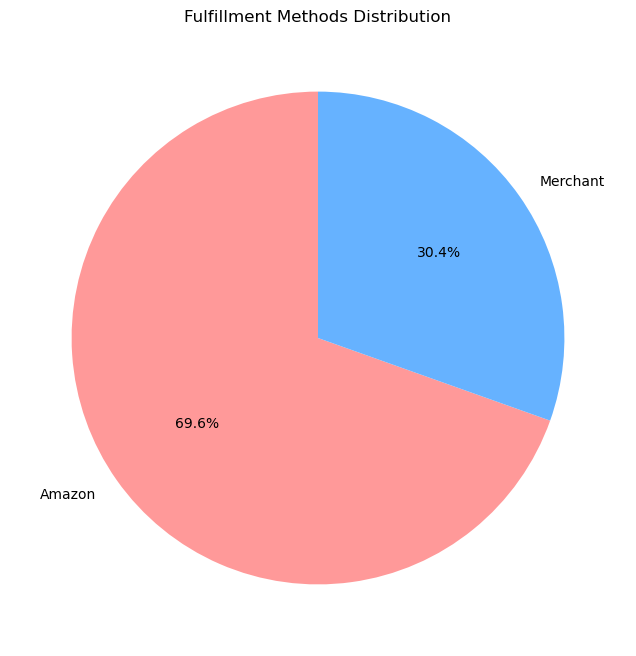

In [61]:
fulfillment_counts.plot.pie(autopct = '%1.1f%%', figsize = (8, 8), colors = ['#FF9999', '#66B2FF'], startangle = 90)
plt.title('Fulfillment Methods Distribution')
plt.ylabel('')
plt.show()

# Customer Segmentation

Assuming "location", "amount", and "quantity" are present

In [63]:
customer_data = df[['Order ID', 'ship-city', 'Amount', 'Qty']]
customer_summary = customer_data.groupby('Order ID').agg({'Amount': 'sum', 'Qty': 'sum'}).reset_index()
customer_summary

,Order ID,Amount,Qty
0,171-0000547-8192359,301.0,1
1,171-0000902-4490745,544.0,1
2,171-0001409-6228339,422.0,1
3,171-0003082-5110755,563.0,1
4,171-0003738-2052324,379.0,1
...,...,...,...
120224,S02-9578181-3610412,0.0,1
120225,S02-9599483-2736812,0.0,1
120226,S02-9649067-3246849,0.0,1
120227,S02-9736323-0094708,0.0,1


# K-Means clustering

In [64]:
X = customer_summary[['Amount', 'Qty']]
kmeans = KMeans(n_clusters = 3, random_state = 42, n_init = 10 )
kmeans.fit(X)
customer_summary['Segment'] = kmeans.labels_

# Scatter plot of clusters

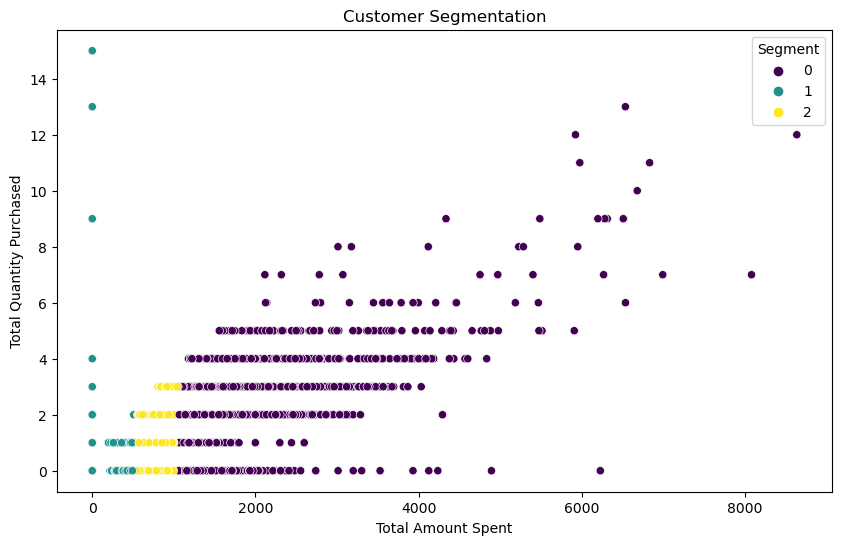

In [65]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = customer_summary, x ='Amount', y ='Qty', hue ='Segment', palette ='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Total Amount Spent')
plt.ylabel('Total Quantity Purchased')
plt.legend(title ='Segment')
plt.show()

# Geographical Analysis

In [66]:
geo_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)

In [67]:
print(geo_sales)

ship-city
BENGALURU    6845390.65
HYDERABAD    4946394.25
MUMBAI       3701843.04
NEW DELHI    3612512.78
CHENNAI      3103415.74
PUNE         2342011.18
KOLKATA      1413603.87
GURUGRAM     1220562.74
THANE        1004503.29
LUCKNOW       938076.34
Name: Amount, dtype: float64


# Bar plot for top locations by sales

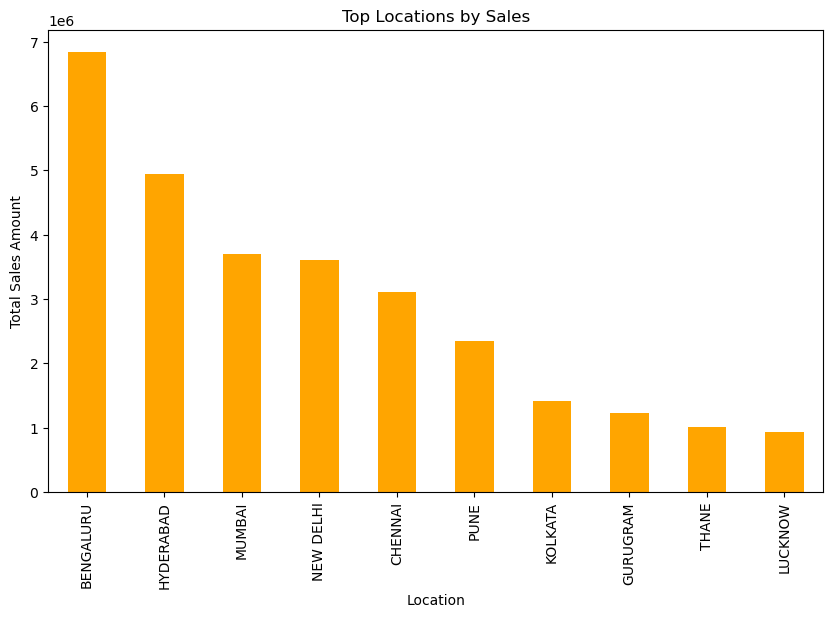

In [68]:
geo_sales.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top Locations by Sales')
plt.xlabel('Location')
plt.ylabel('Total Sales Amount')
plt.show()

# Business Insights

In [69]:
print("\nKey Insights:")
print("1. Sales peak during specific periods, which can inform marketing strategies.")
print("2. Popular product categories include:")
print(product_category)
print("3. Fulfillment methods distribution suggests areas for operational improvement.")
print("4. Customer segmentation identified three distinct groups.")
print("5. Geographical analysis highlights key regions like:")
print(geo_sales)



Key Insights:
1. Sales peak during specific periods, which can inform marketing strategies.
2. Popular product categories include:
Category
T-shirt     50292
Shirt       49877
Blazzer     15500
Trousers    10616
Perfume      1157
Wallet        926
Socks         440
Shoes         165
Watch           3
Name: count, dtype: int64
3. Fulfillment methods distribution suggests areas for operational improvement.
4. Customer segmentation identified three distinct groups.
5. Geographical analysis highlights key regions like:
ship-city
BENGALURU    6845390.65
HYDERABAD    4946394.25
MUMBAI       3701843.04
NEW DELHI    3612512.78
CHENNAI      3103415.74
PUNE         2342011.18
KOLKATA      1413603.87
GURUGRAM     1220562.74
THANE        1004503.29
LUCKNOW       938076.34
Name: Amount, dtype: float64


# Recommendations:

1. Leverage seasonal trends for promotional campaigns.
2. Prioritize high-demand products for inventory management.
3. Improve delivery times in high-sales regions.
4. Introduce loyalty programs to retain high-spending customers.
5. Optimize logistics for less effective fulfillment methods.